# Ephemeris object imaging: continuum (mosaic gridder) - explicitly specified the internal epehemeris table example

####  This demo works with CAS-13593 fix

This nootebook demonstlates continuum imaging of the ephemeris objects. 
by specifying the table explicitly via the phasecenter parameter

In [1]:
# extra packages needed
#!pip install astropy
#!pip install aplpy
#!pip install ipynb

In [2]:
# import helper functions defined in 'Trackfield' mfs mosaic notebook
# requires ipynb 
from ipynb.fs.defs.ephemimagingVenusMfsMosaicTrackfield import *

In [3]:
from casatasks import getephemtable, tclean, exportfits, listobs, clearstat
from casatools import measures, quanta, table, image, msmetadata
import os
from astropy.io import fits
from matplotlib import pyplot
import pylab as pl
import aplpy
import shutil
me = measures()
qa = quanta()
tb = table()
ia = image()
msmd = msmetadata()

In [7]:
datapath='/home/casa/data/casatestdata/measurementset/alma/'
# Use local data directory
#datapath='/Volumes/ssd1/casatestdata/measurementset/alma/'
#datapath='/Users/ttsutsum/SWDevel/ephemdemo/notebooks/'

In [8]:
msfile='venus_ephem_test.ms'
if os.path.exists(msfile):
    shutil.rmtree(msfile)
os.system(f'cp -r {datapath}{msfile} {msfile}')

0

In [9]:
imgname='mosaic-mfs-ineph-venus'

In [10]:
delete_tcleanimages(imgname)

In [11]:
ephemtab = get_attachedEphemtablepath(msfile, 0)
print(ephemtab)

/export/home/murasame2/casadev/ephemimaging/demo/notebooks/venus_ephem_test.ms/FIELD/EPHEM0_Venus_58491.4.tab


In [12]:
ret=tclean(vis=msfile, field='Venus', imagename=imgname, imsize=[288, 288], cell=['0.14arcsec'], 
           phasecenter=ephemtab, specmode='mfs', gridder='mosaic', usepointing=True, niter=100)
ret['iterdone']

2024-04-18 20:18:12	WARN	tclean::::casa	Warning! Non-zero values at the edge of the .pb image can cause unexpected aliasing effects! (found value 0.722619354724884 at index [284, 144, 0, 0])


100

### Convert a CASA image to FITS image for displaying the image via aplpy

Get the direction of Venus at the first timestamp of the select data from the ephemeris table

In [13]:
from casatasks import imhead
iminfo=imhead(imgname+'.image', mode='list')
iminfo['date-obs']

'2019/01/08/11:21:50.208000'

In [14]:
# Get the first time stamp 
msmd.open(msfile)
t0 = msmd.timesforfield(0)[0]
reftm=qa.quantity(t0,'s')
reftmcal = qa.time(reftm,form='ymd')
print(f'reftm:{reftmcal}')
msmd.done()
# Note that this time is different from what image header gives
# 
# find the direction of Venus (use the date-obs from the image header)

ineph_dir = ephem_dir(ephemtab, iminfo['date-obs'], 'ALMA')
print(ineph_dir)
ineph_rad = qa.convert(ineph_dir['m0'],'deg')
ineph_decd = qa.convert(ineph_dir['m1'],'deg')
inephmarker = {'ineph':{'ra':ineph_rad['value'], 'dec':ineph_decd['value']}}

reftm:['2019/01/08/11:23:28']
{'m0': {'unit': 'rad', 'value': -2.1053946095161686}, 'm1': {'unit': 'rad', 'value': -0.2960760011918846}, 'refer': 'ICRS', 'type': 'direction'}


INFO: Setting slices=[0, 0] [aplpy.core]


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


INFO: Auto-setting vmin to -3.724e+00 [aplpy.core]
INFO: Auto-setting vmax to  3.605e+00 [aplpy.core]
ky=ineph
ineph at: 15:57:28.746, -016.57.50.059
image center: ('15:57:28.746', '-016.57.50.059')


<Figure size 1500x1500 with 0 Axes>

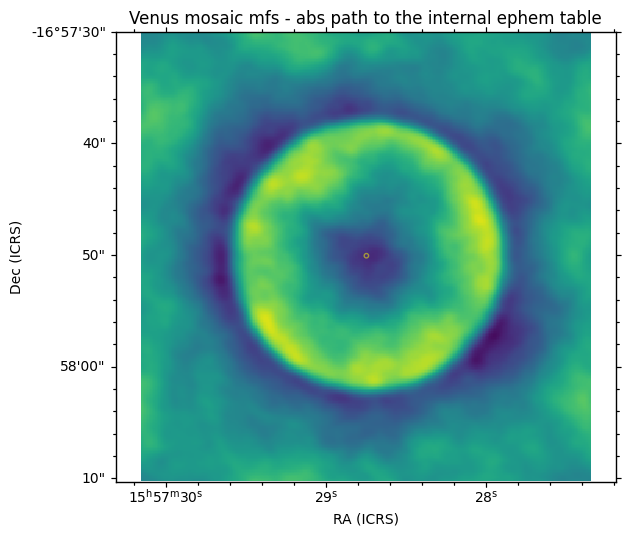

In [15]:
displayImage(imgname+'.image', markers=inephmarker, 
             title='Venus mosaic mfs - abs path to the internal ephem table')

As expected, the center of the image agrees with the position from the internal ephemeris table at the time recorded in the image header and the the source appears at the center of the image.
The result is identical to the tclean run with 'TRACKFIELD'.

In [16]:
print("internal ephem dir = ",qa.time(ineph_dir['m0'],prec=9),qa.angle(ineph_dir['m1'],prec=9))
printImageCenter(imgname+'.image')

internal ephem dir =  ['15:57:28.746'] ['-016.57.50.059']


('15:57:28.746', '-016.57.50.059')